In [70]:
import numpy as np
from matplotlib.pylab import *
# Parâmetros do modelo
# Parâmetros do modelo
A, B, C, M, N, D, K, G, T = [1.25, 0.008, 0.0001, 1.1, 0.007, 0.003, 0.0015, 0.2, 0.2]
# Condições iniciais
# populações iniciais
L0=53
Clh0=67
Cst0 =75
T_total = 100# tempo total de simulação
n_steps = 10000 # número de passos
max_population_lobo=800
max_population_coelho=1300
max_population_castor=1400
# Funções que definem as equações diferenciais do modelo
def f1(L, Clh, Cst):  # para a presa Coelho e Competidor do Castor dClh/dt
    return (A * Clh*(1 - Clh / max_population_coelho)) - (B * Clh * L)  - (C * Clh * Cst)
    #A = a taxa de crescimento dos Coelhos na ausência de predadores;
    #B = a taxa de predação do Coelho pelo Lobo;
    #C = a taxa de competição por recursos do Coelho com o Castor; 
def f2(L, Clh, Cst):  # para a presa Castor e Competidor do Coelho dCst/dt
    return (M * Cst*(1 - Cst / max_population_castor)) - (N * Cst * L) - (C * Clh * Cst)
    #M = a taxa de crescimento dos Castores na ausência de predadores;
    #N = a taxa de predação do Castor pelo Lobo;
    #C = a taxa de competição por recursos do Coelho com o Castor;
def f3(L, Clh, Cst):  # para a Lobo dL/dt
    return ((D * L * Clh) + (K * L * Cst))*(1 - L / max_population_lobo) - (G * L) - (T * L)
    #D = a eficiência de conversão dos Coelhos em novos Lobos
    #K = a eficiência de conversão dos Castores em novos lobos
    #G = a taxa de mortalidade do Lobo na ausência de Coelhos
    #T = a taxa de mortalidade do Lobo na ausência de Castores
L = np.zeros(n_steps + 1)
Clh = np.zeros(n_steps + 1)
Cst = np.zeros(n_steps + 1)
L[0], Clh[0], Cst[0] = L0, Clh0, Cst0

# Simulação usando método de Euler
dt = T_total / n_steps
for k in range(n_steps):
    L[k+1] = max(0, L[k] + dt * f3(L[k], Clh[k], Cst[k]))
    Clh[k+1] = max(0, Clh[k] + dt * f1(L[k], Clh[k], Cst[k]))
    Cst[k+1] = max(0, Cst[k] + dt * f2(L[k], Clh[k], Cst[k]))


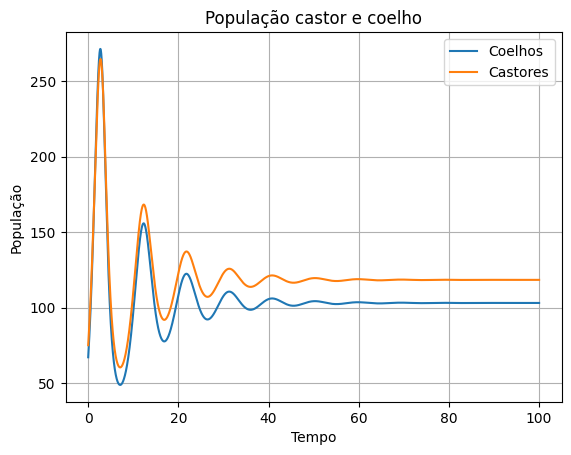

In [71]:
plt.plot(np.linspace(0, T_total, n_steps + 1), Clh, label='Coelhos')
plt.plot(np.linspace(0, T_total, n_steps + 1), Cst, label='Castores')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('População castor e coelho')
plt.legend()
plt.grid(True)
plt.show()

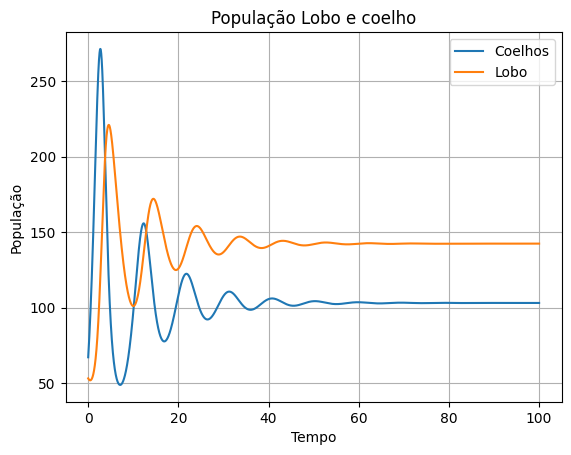

In [72]:
plt.plot(np.linspace(0, T_total, n_steps + 1), Clh, label='Coelhos')
plt.plot(np.linspace(0, T_total, n_steps + 1), L, label='Lobo')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('População Lobo e coelho')
plt.legend()
plt.grid(True)
plt.show()

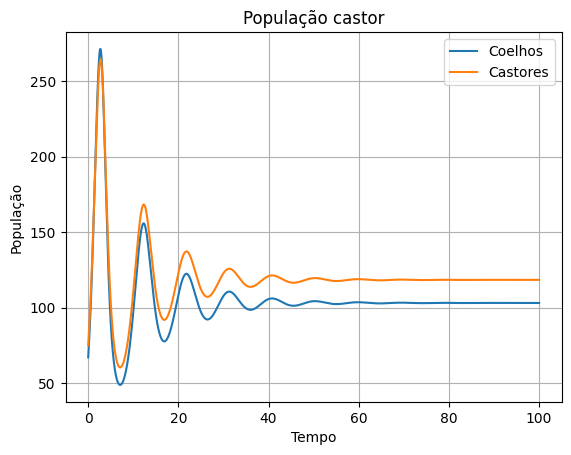

In [73]:
plt.plot(np.linspace(0, T_total, n_steps + 1), Clh, label='Coelhos')
plt.plot(np.linspace(0, T_total, n_steps + 1), Cst, label='Castores')
plt.xlabel('Tempo')
plt.ylabel('População')
plt.title('População castor')
plt.legend()
plt.grid(True)
plt.show()